In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans, DBSCAN

#경고메세지 무시
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV

In [78]:
%matplotlib inline
#한글 폰트 적용 
matplotlib.rc('font',family='NanumGothic')
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']='NanumGothic'
#seaborn에서 한글 깨짐 해결: unicode minus 사용하지 않겠다.
plt.rcParams['axes.unicode_minus'] = False

In [79]:
member = \
pd.read_csv('/home/piai/s_1114/Project/Data/jeju_member.csv',encoding='UTF-8')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6013 non-null   object
 1   birth_date      6013 non-null   object
 2   gender          6013 non-null   object
 3   age             6013 non-null   int64 
 4   agegroup        6013 non-null   object
 5   customer_type   6013 non-null   object
 6   customer_grade  6013 non-null   object
 7   gaip_date       6013 non-null   object
 8   taltoi_date     634 non-null    object
 9   member_month    6013 non-null   int64 
 10  gaip_path       6013 non-null   object
 11  flag_member     6013 non-null   object
 12  flag_rcv_sms    6013 non-null   object
 13  flag_rcv_email  6013 non-null   object
 14  flag_rcv_post   6013 non-null   object
 15  zipcode         6013 non-null   object
 16  sigun           6013 non-null   object
 17  dong            6013 non-null   object
 18  ri      

In [80]:
member.head()

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,매장,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118133,1981-03-20,남,39,30대,일반,4Silver,2011-12-07,2014-04-02,28,매장,N,Y,Y,N,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
3,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,97,인터넷,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학
4,C118280,1959-08-28,남,61,60대,일반,3Gold,2011-12-11,2016-05-02,53,기타,N,N,N,N,699-905,서귀포시,성산읍,삼달리,제주 서귀포시 성산읍 삼달리


In [81]:
member['my_dong'] = member.apply(lambda member: member['sigun'] if(member['dong'][-1]=='동')else member['dong'],axis=1)
member

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,my_dong
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,...,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동,제주시
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,...,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동,제주시
2,C118133,1981-03-20,남,39,30대,일반,4Silver,2011-12-07,2014-04-02,28,...,N,Y,Y,N,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍,성산읍
3,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,97,...,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학,애월읍
4,C118280,1959-08-28,남,61,60대,일반,3Gold,2011-12-11,2016-05-02,53,...,N,N,N,N,699-905,서귀포시,성산읍,삼달리,제주 서귀포시 성산읍 삼달리,성산읍
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,C705804,1962-08-13,여,58,50대,일반,2Platinum,2019-12-09,NaN,1,...,Y,Y,Y,Y,697-070,서귀포시,동홍동,NaN,제주 서귀포시 동홍동,서귀포시
6009,C706457,1995-10-12,여,25,20대,일반,4Silver,2019-12-11,NaN,1,...,Y,Y,Y,N,690-781,제주시,화북일동,제주대학교사라캠퍼스,제주 제주시 화북일동 제주대학교사라캠퍼스,제주시
6010,C707942,1986-09-20,여,34,30대,일반,4Silver,2019-12-19,NaN,1,...,Y,Y,N,Y,695-964,제주시,조천읍,신흥리,제주 제주시 조천읍 신흥리,조천읍
6011,C707954,1984-04-20,여,36,30대,일반,3Gold,2019-12-19,NaN,1,...,Y,N,N,N,690-806,제주시,도남동,1~51,제주 제주시 도남동 1~51,제주시


<Figure size 3600x1440 with 0 Axes>

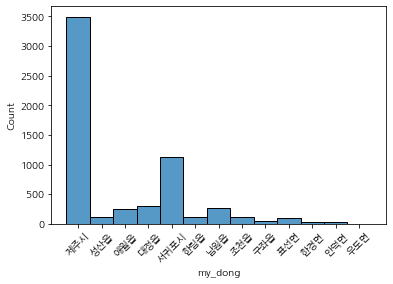

<Figure size 3600x1440 with 0 Axes>

In [82]:

# plt.text(13, 10, '출처')
sns.histplot(x=member['my_dong'])
plt.xticks(rotation=45)
plt.figure(figsize=(50,20))


In [83]:
df_jeju = member[member['my_dong']=='제주시']
df_jeju

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,my_dong
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,...,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동,제주시
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,...,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동,제주시
6,C118288,1972-03-16,남,48,40대,일반,4Silver,2011-12-11,2012-07-30,7,...,N,N,Y,Y,690-042,제주시,용담2동,NaN,제주 제주시 용담2동,제주시
7,C118290,1963-10-17,여,57,50대,일반,3Gold,2011-12-11,NaN,97,...,Y,Y,Y,Y,690-162,제주시,오라2동,NaN,제주 제주시 오라2동,제주시
8,C118291,1962-07-19,여,58,50대,일반,1Royal,2011-12-11,NaN,97,...,Y,Y,N,Y,690-760,제주시,노형동,부영아파트,제주 제주시 노형동 부영아파트,제주시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,C704612,1969-01-28,여,51,50대,일반,3Gold,2019-12-03,NaN,1,...,Y,Y,Y,Y,690-813,제주시,연동,1~271,제주 제주시 연동 1~271,제주시
6005,C704649,1964-10-12,여,56,50대,일반,3Gold,2019-12-02,NaN,1,...,Y,Y,N,N,690-081,제주시,도련1동,NaN,제주 제주시 도련1동,제주시
6006,C704655,1986-08-18,여,34,30대,일반,3Gold,2019-12-04,NaN,1,...,Y,Y,N,Y,690-818,제주시,연동,1906~2515,제주 제주시 연동 1906~2515,제주시
6009,C706457,1995-10-12,여,25,20대,일반,4Silver,2019-12-11,NaN,1,...,Y,Y,Y,N,690-781,제주시,화북일동,제주대학교사라캠퍼스,제주 제주시 화북일동 제주대학교사라캠퍼스,제주시


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

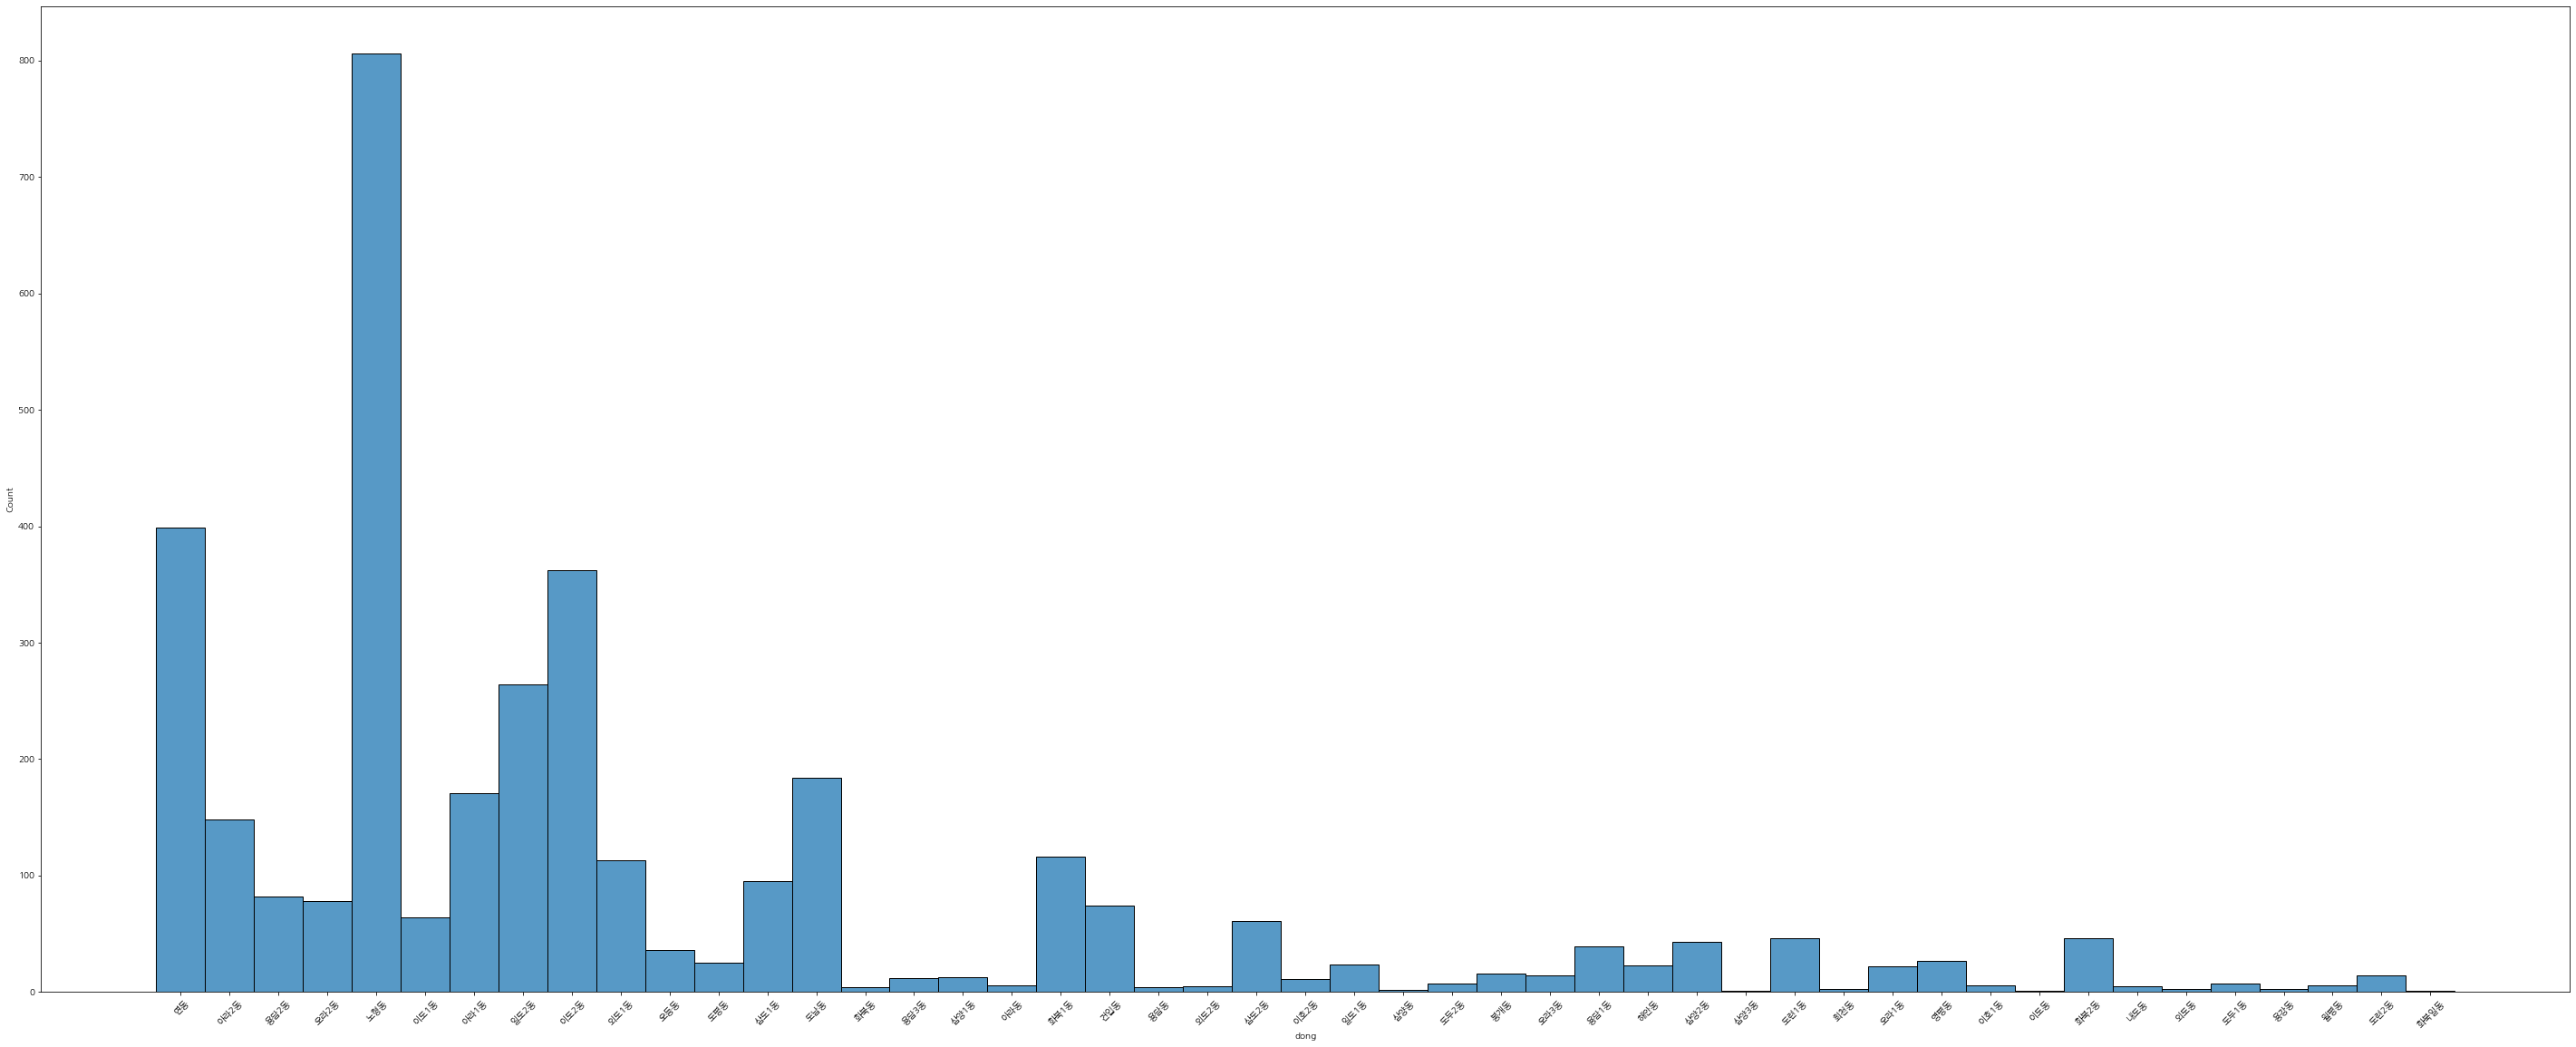

In [66]:
plt.figure(figsize=(50,20))
# sns.set(font_scale=5)
sns.histplot(x=df_jeju['dong'])
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

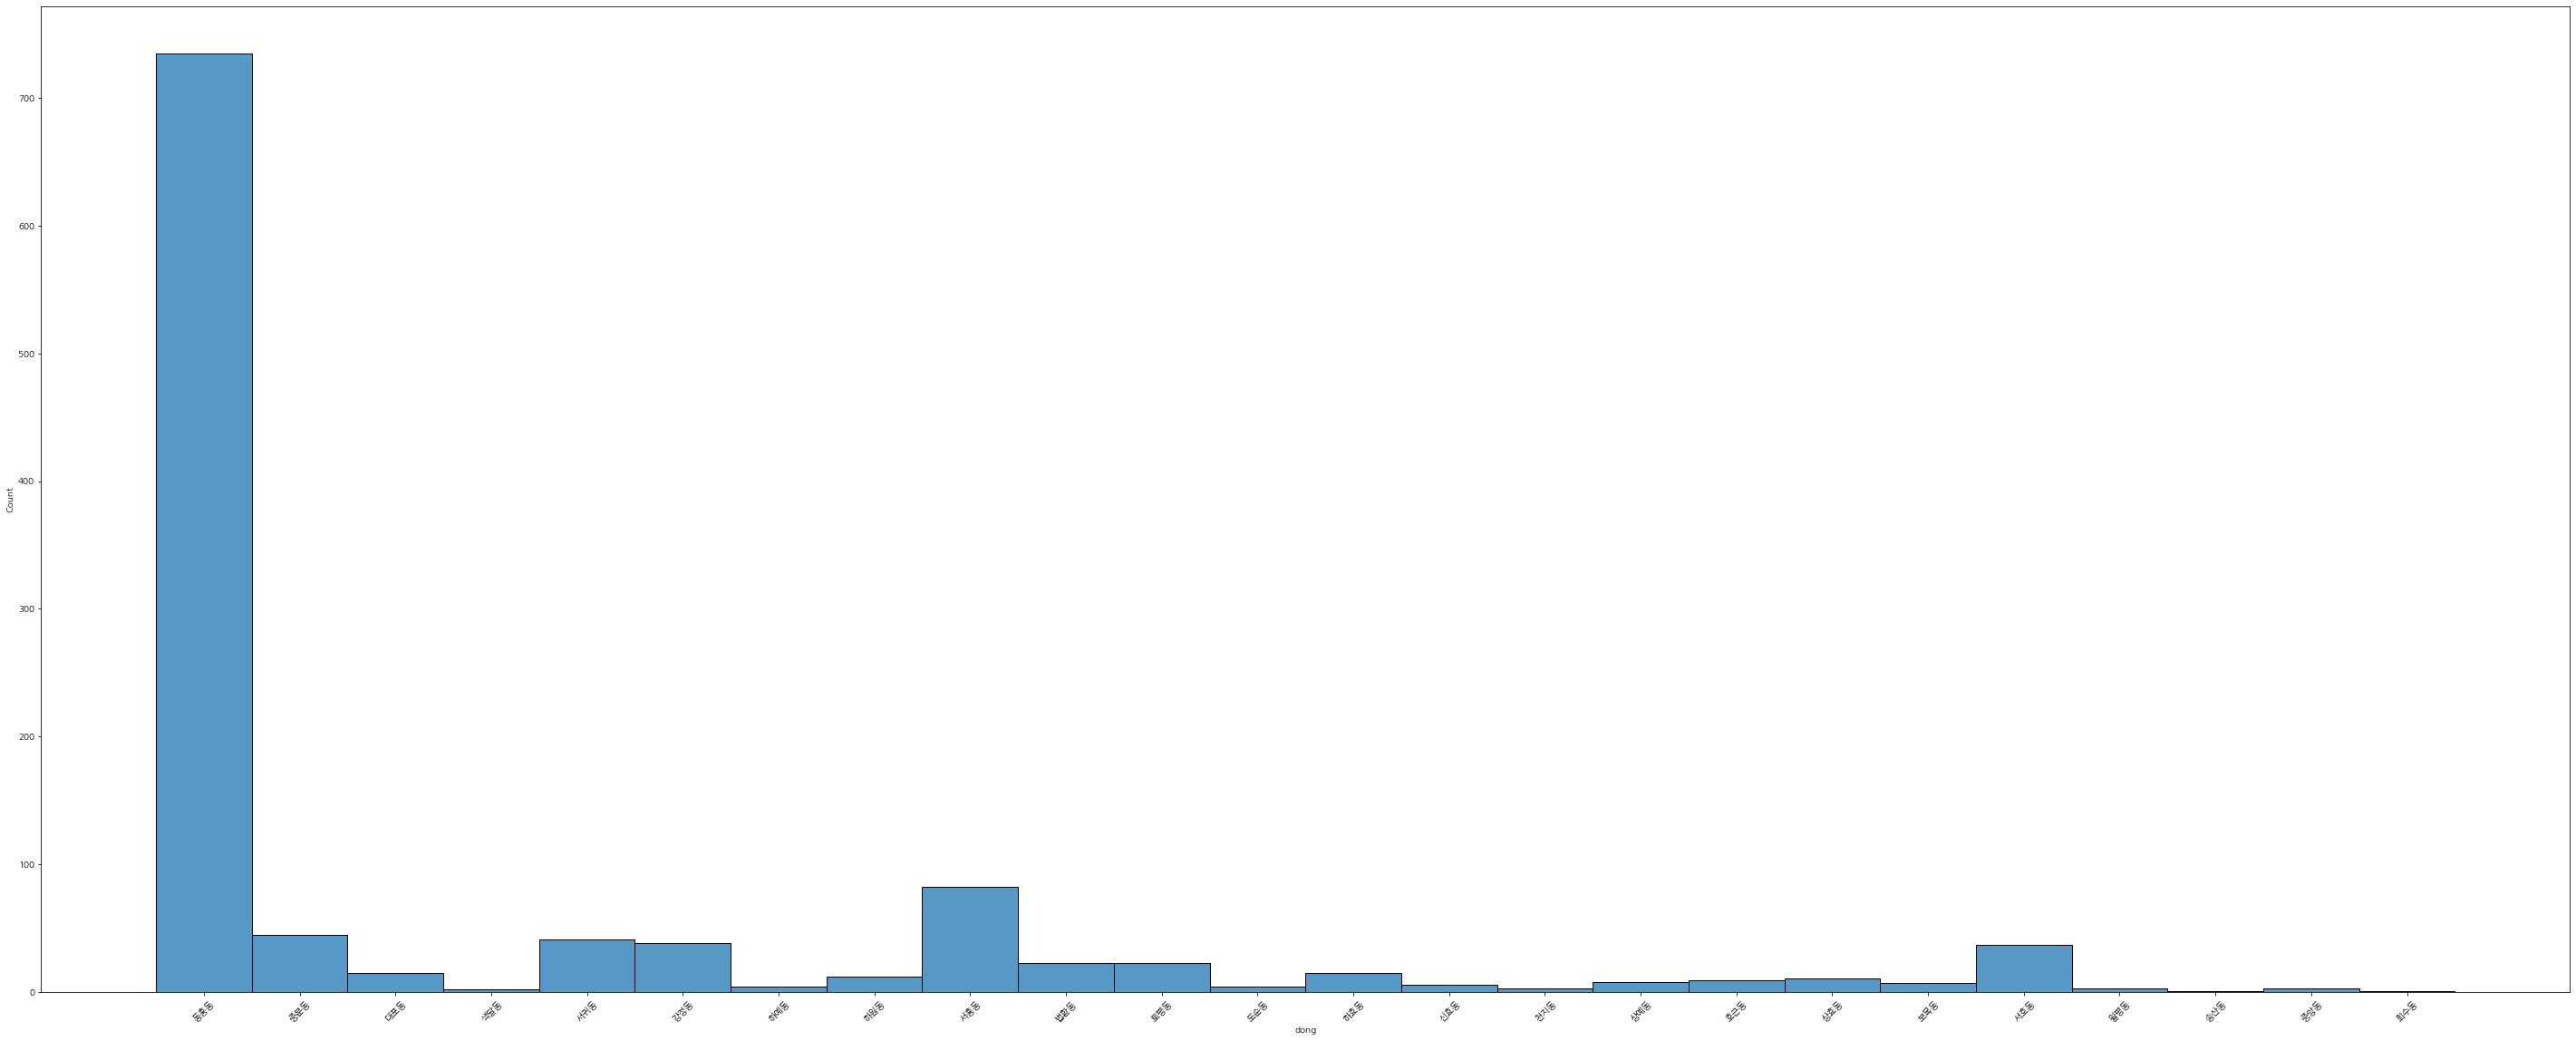

In [67]:
df_seoguipo = member[member['my_dong']=='서귀포시']
plt.figure(figsize=(50,20))
# sns.set(font_scale=5)
sns.histplot(x=df_seoguipo['dong'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='gender', ylabel='Count'>

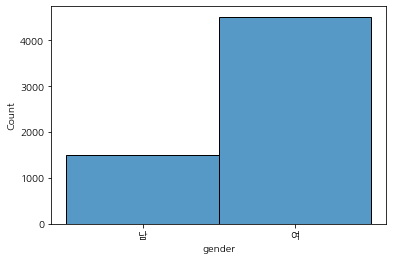

In [10]:
sns.histplot(x=member['gender'])

<AxesSubplot:xlabel='agegroup', ylabel='Count'>

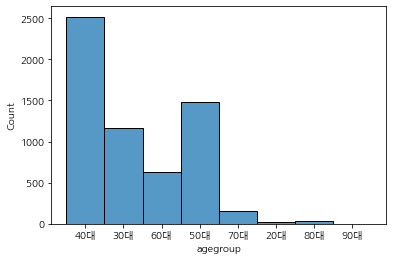

In [11]:
sns.histplot(x=member['agegroup'])

In [12]:
member

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,my_dong
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,...,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동,제주시
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,...,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동,제주시
2,C118133,1981-03-20,남,39,30대,일반,4Silver,2011-12-07,2014-04-02,28,...,N,Y,Y,N,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍,성산읍
3,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,97,...,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학,애월읍
4,C118280,1959-08-28,남,61,60대,일반,3Gold,2011-12-11,2016-05-02,53,...,N,N,N,N,699-905,서귀포시,성산읍,삼달리,제주 서귀포시 성산읍 삼달리,성산읍
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,C705804,1962-08-13,여,58,50대,일반,2Platinum,2019-12-09,NaN,1,...,Y,Y,Y,Y,697-070,서귀포시,동홍동,NaN,제주 서귀포시 동홍동,서귀포시
6009,C706457,1995-10-12,여,25,20대,일반,4Silver,2019-12-11,NaN,1,...,Y,Y,Y,N,690-781,제주시,화북일동,제주대학교사라캠퍼스,제주 제주시 화북일동 제주대학교사라캠퍼스,제주시
6010,C707942,1986-09-20,여,34,30대,일반,4Silver,2019-12-19,NaN,1,...,Y,Y,N,Y,695-964,제주시,조천읍,신흥리,제주 제주시 조천읍 신흥리,조천읍
6011,C707954,1984-04-20,여,36,30대,일반,3Gold,2019-12-19,NaN,1,...,Y,N,N,N,690-806,제주시,도남동,1~51,제주 제주시 도남동 1~51,제주시
